# Visualizations

# Part 1: Basemap

## Geographical Maps:

In this part, you will find out how to:
- present a geographical variable (a variable that has at least 2 dimensions as latitude and longitude)
- set axes labels and limits
- set plot title
- set colorbar
- set the color and type of contours

### Data analysis

In [106]:
# importing libraries
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import h5py

# reading map data
fle_grid = Dataset('b.e20.B1850.f09_g17.pi_control.all.297.cam.h0.0208-01.nc')
lat = fle_grid.variables['lat'][:] # latitude
lon = fle_grid.variables['lon'][:] # longitude
lat_mg, lon_mg = np.meshgrid(lat, lon) # making meshgrid

TS  = fle_grid.variables['TS'][:] - 273.15 # surface temperature converted from kelvin to celcius unit
surf_temp = TS[0,:,:] # trimming variable
surf_temp = np.transpose(surf_temp) # making it consistent with lat and lon dimension

### Plot

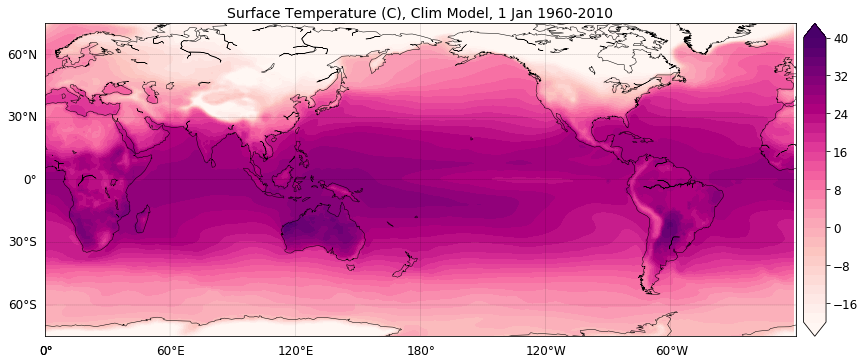

In [108]:
plt.figure(figsize=(14,9))
# map settings and limits
map = Basemap(projection='cyl',llcrnrlat=-75,urcrnrlat=75,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
map.drawcoastlines(linewidth=.5) # coastlines
map.drawparallels(np.arange(-90,91,30.),labels=[1,0,0,0],linewidth=0.2,fontsize=12) # vertical grids
map.drawmeridians(np.arange(-180,180,60.),labels=[0,0,0,1],linewidth=0.2,fontsize=12) # horizontal grids
x,y = map(lon_mg,lat_mg)
clevs = np.arange(-20.,40.01,2) # limits of the plotted variable
csf = map.contourf(x,y,surf_temp,clevs,extend='both',cmap='RdPu') # filled contours
cb = map.colorbar(csf,"right", extend='neither',size="3%", pad="1%")
title_name = "Surface Temperature (C), Clim Model, 1 Jan 1960-2010"
plt.title(title_name, fontsize = 14) # title
plt.show()


# Part 2: Matplotlib

## a) Scatterplots and Linear Regression:

In this part, you will find out how to:
- present a scatterplot to show relationship between variables
- fit a line to the data
- calculate and show line equation and correlation
- set axes labels and limits
- set plot title
- set the color and type of line and scatter plots

### Data analysis

In [2]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression


# reading and preparing data
met_df = pd.read_csv('./seattleWeather_1948-2017.csv')

# imputing missing values
P_median = met_df.PRCP.median()
met_df.PRCP.fillna(P_median, inplace = True)

# changing DATE variable to datetime format
date = pd.to_datetime(met_df.DATE, format="%Y-%m-%d")
met_df['DATE'] = date

# creating daily climatological variables
from datetime import datetime
DoY_str = met_df.DATE.dt.strftime('%j')
Day_of_Year = [int(a) for a in DoY_str]
#group data based on "day of year"
groupD      = met_df.groupby(Day_of_Year)
DoY_TMAX   = groupD['TMAX'].mean()  # daily climatological mean TMAX
daily_TMAX = [DoY_TMAX[a] for a in Day_of_Year]
## daily PRCP
#group data based on "day of year"
DoY_PRCP   = groupD['PRCP'].mean()  # daily climatological mean PRCP
daily_PRCP = [DoY_PRCP[a] for a in Day_of_Year]

# adding new variables to DataFrame
daily_PRCP_df  = pd.DataFrame(daily_PRCP,  columns = ['daily_PRCP'])
daily_TMAX_df  = pd.DataFrame(daily_TMAX,  columns = ['daily_TMAX'])

met_new_df = pd.concat([daily_TMAX_df,daily_PRCP_df], axis = 1)

# defining x and y
X, Y = met_new_df['daily_TMAX'].values.reshape(-1, 1), met_new_df['daily_PRCP']

In [3]:
# calculating linear regression parameters
Lin_Reg = LinearRegression()
Lin_Reg.fit(X, Y)
R_squared_train = Lin_Reg.score(X, Y)

### Plot

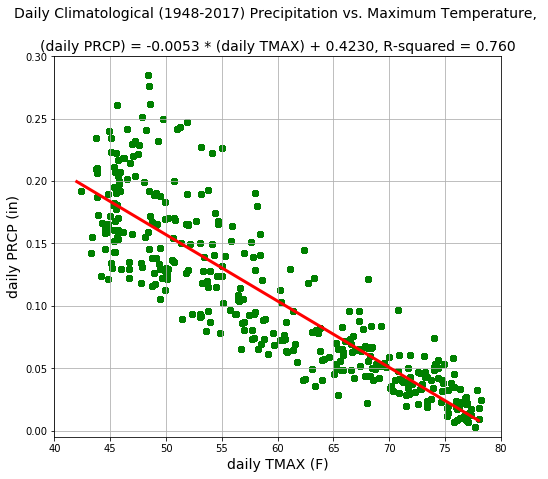

In [4]:
# defining linear regression variables:
T = np.array(range(42,79))
P = Lin_Reg.coef_[0] *  T + Lin_Reg.intercept_

# scatterplot and linear fit:
fig, ax1 = plt.subplots(figsize=(8, 7))
plt.plot(T, P, c = 'red', lw = 3)
plt.scatter(X, Y, c = 'green', marker = 'o')

# setting axes:
ax1.set_xlabel('daily TMAX (F)', fontsize=14)
ax1.set_ylabel('daily PRCP (in)', fontsize=14)
plt.xlim([40, 80])
plt.ylim([-0.005, 0.3])

# setting title, and priting the line equation
TITLE1 = 'Daily Climatological (1948-2017) Precipitation vs. Maximum Temperature, \n \n'
TITLE2 = '(daily PRCP) = %.4f'% Lin_Reg.coef_
TITLE3 = ' * (daily TMAX) + %.4f, ' %Lin_Reg.intercept_
TITLE4 = 'R-squared = %.3f'% R_squared_train

ax1.set_title(TITLE1+TITLE2+TITLE3+TITLE4, fontsize=14)
plt.grid(True)
plt.show()

## b) Line Plots and Area Charts: Complex Time Series:

In this part, you will find out how to:
- present time series of multiple models:
  - ensemble spread as filled area
  - ensemble mean as line
- set axes labels, ticks, font size, and limits
- set plot title and legend
- set the color and tickness of lines, and color of filled areas

### Data analysis

In [13]:
# importing libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import scipy.io
import h5py

# reading data
sst_glb_CMIP6_ann_anom          = scipy.io.loadmat('sst_glb_CMIP6_ann_anom.mat')['sst_glb_CMIP6_ann_anom']
sst_glb_AI_C_1960_2009_ann_anom = scipy.io.loadmat('sst_glb_AI_C_1960_2009_ann_anom.mat')['sst_glb_AI_C_1960_2009_ann_anom']
sst_glb_AI_C_1965_2004_ann_anom = scipy.io.loadmat('sst_glb_AI_C_1965_2004_ann_anom.mat')['sst_glb_AI_C_1965_2004_ann_anom']

# defining time variable
Time_ann  = np.arange(1960,2010)
Time_ann2 = np.arange(1965,2005)

### Plot

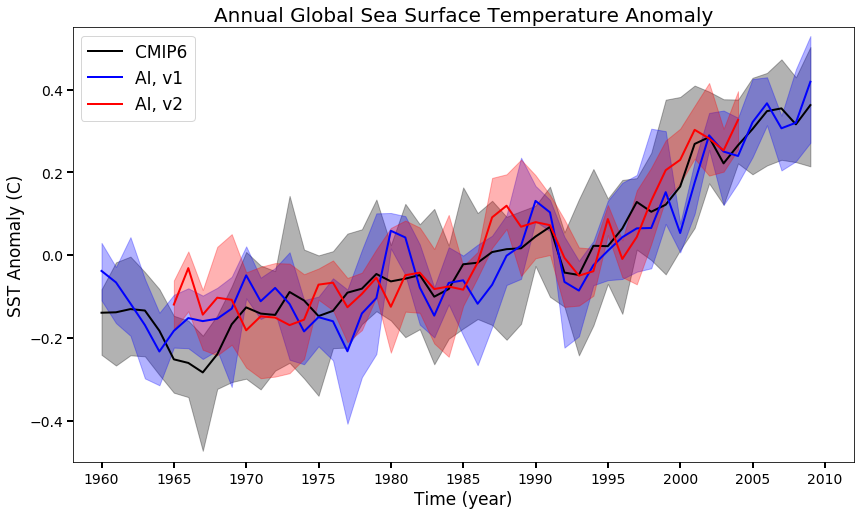

In [16]:
fig, ax = plt.subplots(figsize=(14,8))

# plotting filled areas for ensemble range
ax.fill_between(Time_ann,np.amin(sst_glb_CMIP6_ann_anom, 1), 
                np.amax(sst_glb_CMIP6_ann_anom, 1), color='k', alpha=0.3)
ax.fill_between(Time_ann,np.amin(sst_glb_AI_C_1960_2009_ann_anom, 1), 
                np.amax(sst_glb_AI_C_1960_2009_ann_anom, 1), color='b', alpha=0.3)
ax.fill_between(Time_ann2,np.amin(sst_glb_AI_C_1965_2004_ann_anom, 1), 
                np.amax(sst_glb_AI_C_1965_2004_ann_anom, 1), color='r', alpha=0.3)

# plotting lines for ensemble means
l3 = plt.plot(Time_ann, np.mean(sst_glb_CMIP6_ann_anom, 1), 'k',linewidth = 2,label='CMIP6')

l1 = plt.plot(Time_ann, np.mean(sst_glb_AI_C_1960_2009_ann_anom, 1), 'b',
              linewidth = 2,label='AI, v1')

l2 = plt.plot(Time_ann2, np.mean(sst_glb_AI_C_1965_2004_ann_anom, 1), 'r',
              linewidth = 2,label='AI, v2')

# axes labels, axes limits, axes ticks, title, legend, ...
plt.xlabel('Time (year)', fontsize = '17')
plt.ylabel('SST Anomaly (C)', fontsize = '17')
plt.title('Annual Global Sea Surface Temperature Anomaly', fontsize = '20')
plt.xticks(fontsize = '14')
plt.yticks(fontsize = '14')
plt.ylim([-0.5, 0.55])
plt.xlim([1958, 2012])
plt.legend(fontsize = 17)#, loc="upper left")
ax.xaxis.set_major_locator(MultipleLocator(5))
plt.grid(False)
plt.tick_params(which='major',color = 'k', width=2, length = 6)

plt.show()

## Part 3: Seaborn
## a) Pairplot:

In this part, you will find out how to:

- quickly look at all possible relationships between variables
- fit a line for each pair
- look at distribution of each variable
- show plots when data is grouped by a certain variable
- set the color and type of lines and markers

/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


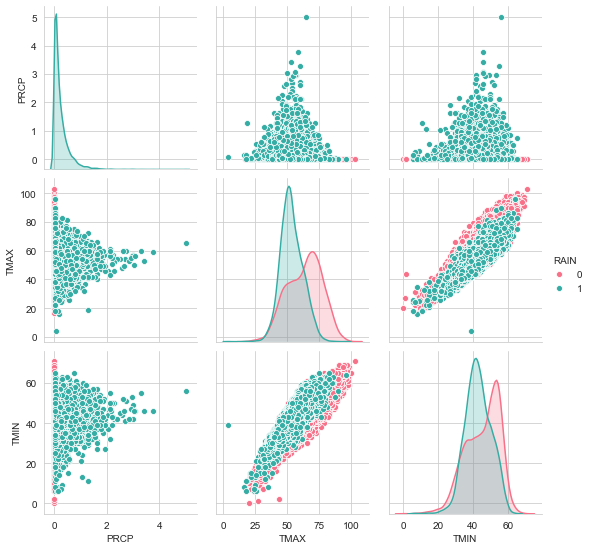

In [44]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder

# reading and preparing data
met_df = pd.read_csv('./seattleWeather_1948-2017.csv')
met_df.PRCP.fillna(met_df.PRCP.median(), inplace = True)
met_df.RAIN.fillna(met_df.RAIN.mode()[0], inplace = True)

RAIN_0_1 = LabelEncoder().fit_transform(met_df.RAIN)
met_df['RAIN'] = RAIN_0_1

# setting plot
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

# pairplot by seaborn
# hue: define the variable that groups the data
# kind: fit a line for each pair
sb.pairplot(met_df, palette = 'husl', hue = 'RAIN', markers = 'o') # , kind = 'reg'
plt.show()

## b) Heatmap:

In this part, you will find out how to:

- quickly visualize correlation between each pair of variables
- set the colormap, range, and text

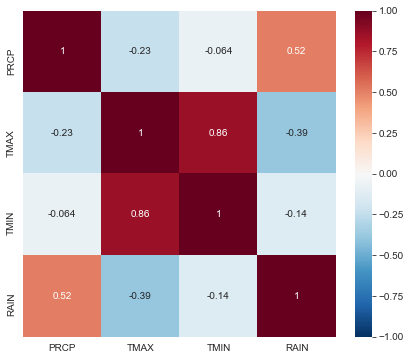

In [42]:
# data was previously loaded.

rcParams['figure.figsize'] = 7, 6

# heatmap by seaborn
# vmin and vmax define the range.
# annot=True: values are shown in each cell.
sb.heatmap(met_df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'RdBu_r')
plt.show()

## c) Boxplots and Barplots :

In this part, you will find out how to:

- compare groups of a variable using boxplots and barplots
- determine distribution of data (quartiles, median, and extremas) using boxplots.
- show plots when data is grouped by a certain variable
- generate multiple subplots
- set the color and type of plots

### Data analysis

In [46]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

# reading and preparing data
train_file = './train.csv'
train_df = pd.read_csv(train_file)

Sex_encode = LabelEncoder().fit_transform(train_df.Sex)
train_df.drop(['Sex'], inplace = True, axis=1)
Sex_df      = pd.DataFrame(Sex_encode, columns = ['Sex_encded'])
train_cl_df = pd.concat([train_df, Sex_df], axis=1)


### Plot

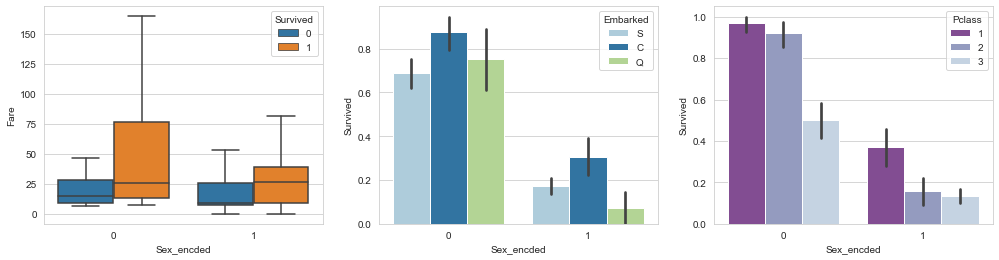

In [66]:
fig, axis = plt.subplots(1, 3,figsize=(17,4))
sb.boxplot(x = 'Sex_encded', y ='Fare', data = train_cl_df, ax = axis[0], hue = 'Survived', showfliers = False)
sb.barplot(x = 'Sex_encded', y ='Survived', data = train_cl_df, ax = axis[1], hue = 'Embarked', palette = 'Paired')
sb.barplot(x = 'Sex_encded', y ='Survived', data = train_cl_df, ax = axis[2], hue = 'Pclass', palette = 'BuPu_r')
plt.show()